## *Data Visualization of GDP per Capita data using Matplotlib and Seaborn*

<p> author: Roman Schulze </p> 
<p> date: 03-01-2021 </p>

This notebook uses a development indicators dataset to visualize GDP data using the matplotlib and seaborn libraries. To visualize the distribution of gdp per capita I am using linecharts, barplots, a piechart and scatterplots.
The colors used in this notebook are inspired by: https://colorhunt.co/. 
The configuration of the barplot was found in:
https://scentellegher.github.io/visualization/2018/10/10/beautiful-bar-plots-matplotlib.html. 
It should be mentioned that the dataset does not include data of the United States of America and some other nations. Therefore the numbers displayed whithin the graphs should not be considered representative. 
Throughout the script I will use the median for calculating averages as it is less sensitive to outliers than the mean.

The notebook is organized as follows:
1. Inspecting the dataset
2. Visualizing GDP Development over time (Longitudinal analysis)
3. Cross-sectional analysis of GDP per capita data from 2014

In [47]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# default settings for xticks
plt.rc("xtick",labelsize=12)
plt.rc("ytick",labelsize=12)
# default settings for legend
import pylab as plot
params = {"legend.fontsize": 16,
          "legend.handlelength": 2}
plot.rcParams.update(params)
# define color palette 
colors = ["#a685e2", "#9f5f80", "#00587a", "#008891", "#cdfffc"]

In [49]:
# center figures
# link: https://moonbooks.org/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### *1. Data Inspection*

In [50]:
# read data
df = pd.read_csv("development_indicators.csv")

In [51]:
# summary of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 10 columns):
Year                                      8910 non-null int64
Continent                                 8910 non-null object
Sub Region                                8910 non-null object
Country                                   8910 non-null object
GDP per Capita                            8910 non-null int64
GDP per Capita (Grouped)                  8910 non-null object
Life Expectancy                           8880 non-null float64
Life Expectancy (Grouped)                 8880 non-null object
C02 Emissions per Person (Tonnes)         8363 non-null float64
Child Mortality Rate (per 1000 births)    8885 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 696.2+ KB
None


In [52]:
# Count missings in each column
print(df.isna().sum())

Year                                        0
Continent                                   0
Sub Region                                  0
Country                                     0
GDP per Capita                              0
GDP per Capita (Grouped)                    0
Life Expectancy                            30
Life Expectancy (Grouped)                  30
C02 Emissions per Person (Tonnes)         547
Child Mortality Rate (per 1000 births)     25
dtype: int64


In [53]:
# Check range of time series
print(f"The data ranges from year {df.Year.unique()[0]} to year {df.Year.unique()[-1]}.")

The data ranges from year 1960 to year 2014.


In [54]:
# summary of GDP per capita over whole time horizon
print(np.round(df["GDP per Capita"].apply([np.mean, np.median, np.var, np.std])))       

mean          11771.0
median         6000.0
var       275646674.0
std           16603.0
Name: GDP per Capita, dtype: float64


### *2. Visualizing GDP Development over time (Longitudinal analysis)*

How did GDP per capita develop since 1960 until 2014?

In [55]:
# Average gdp and life expectancy for each year worldwide
data = df.groupby(["Year"])["GDP per Capita", "Life Expectancy"].median()
# Derive Growth rate of GDP per capita
data["GDP per Capita Growth Rate"] = data["GDP per Capita"].pct_change(periods=1)*100

# Average gdp and life expectancy for each year worldwide
data["GDP per Capita Std"] = df.groupby(["Year"])["GDP per Capita"].std()
# Derive Growth rate of GDP per capita
data["GDP per Capita Std Growth Rate"] = data["GDP per Capita Std"].pct_change(periods=1)*100

# Average gdp and life expectancy for each year worldwide
data["GDP per Capita Var"] = df.groupby(["Year"])["GDP per Capita"].var()
# Derive Growth rate of GDP per capita
data["GDP per Capita Var Growth Rate"] = data["GDP per Capita Var"].pct_change(periods=1)*100

# check first five rows
print(data.head())

      GDP per Capita  Life Expectancy  GDP per Capita Growth Rate  \
Year                                                                
1960            3320             55.0                         NaN   
1961            3390             56.1                    2.108434   
1962            3430             57.2                    1.179941   
1963            3515             58.4                    2.478134   
1964            3690             58.8                    4.978663   

      GDP per Capita Std  GDP per Capita Std Growth Rate  GDP per Capita Var  \
Year                                                                           
1960         4951.958404                             NaN        2.452189e+07   
1961         5245.777805                        5.933398        2.751818e+07   
1962         5562.732297                        6.042088        3.094399e+07   
1963         5985.691537                        7.603444        3.582850e+07   
1964         6684.010088            

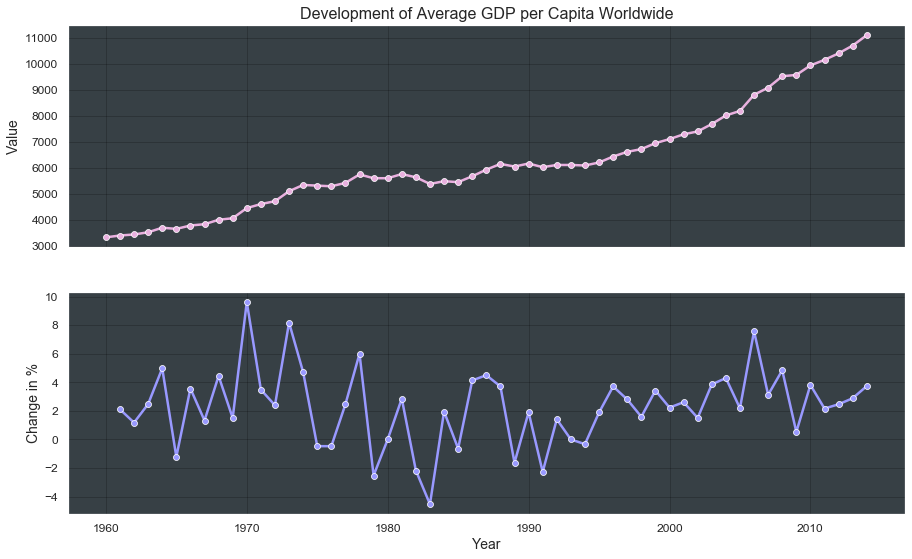

In [56]:
# instantiate a figure and axis object 
fig, ax = plt.subplots(2,1, figsize=(15, 9), sharex=True)

# create a linechart
sns.lineplot(data=data, x=data.index, y="GDP per Capita", 
                  color="#e9b0df", label="GDP per Capita",
                  linewidth=2.5, marker = "o", ax=ax[0])

# add linechart
sns.lineplot(data=data, x=data.index, y="GDP per Capita Growth Rate", 
                  color="#9999ff", label="GDP per Capita", 
                  linewidth=2.5, marker="o", ax=ax[1])

# adjust axis, title, legend  and grid settings 
for i in range(0, 2):
    ax[i].set_facecolor("#374045")
    ax[i].grid(axis="x", linestyle="-", alpha=0.2, color="black")
    ax[i].grid(axis="y", linestyle="-", alpha=0.2, color="black")
    ax[i].get_legend().remove()
    ax[i].lines[0].set_linestyle("-")
    ax[i].xaxis.set_tick_params(labelsize=12)
    ax[i].yaxis.set_tick_params(labelsize=12)

ax[1].set_xlabel("Year", fontsize=14)
ax[0].set_ylabel("Value", fontsize=14)
ax[1].set_ylabel("Change in %", fontsize=14)
ax[0].set_title("Development of Average GDP per Capita Worldwide", 
                fontsize=16)

# show plot
plt.show()

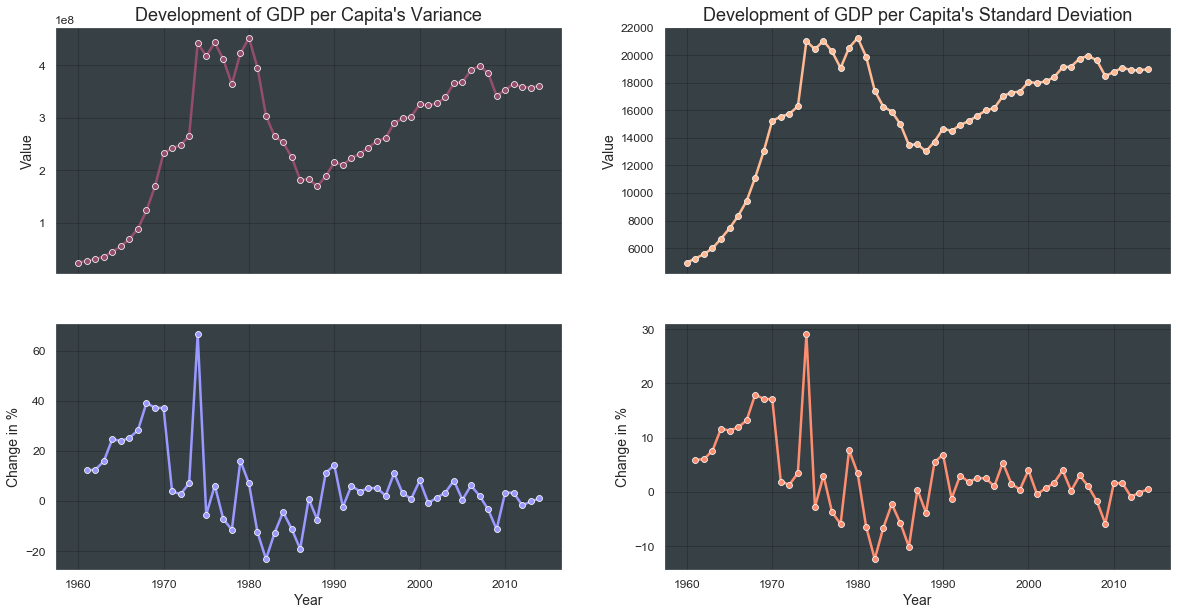

In [57]:
# instantiate a figure and axis object 
fig, axes = plt.subplots(2, 2, figsize=(20, 10),  sharex=True)

# create a linechart
sns.lineplot(data=data, x=data.index, y="GDP per Capita Var", 
                  color="#944e6c", label="GDP per Capita Var",
                  linewidth=2.5, marker = "o", ax=axes[0, 0])

# add linechart
sns.lineplot(data=data, x=data.index, y="GDP per Capita Var Growth Rate", 
                  color="#9999ff", label="Var Growth Rate", 
                  linewidth=2.5, marker="o", ax=axes[1, 0])

# add linechart
sns.lineplot(data=data, x=data.index, y="GDP per Capita Std", 
                  color="#FFBA93", label="GDP per Capita Std",
                  linewidth=2.5, marker = "o", ax=axes[0, 1])

# add linechart
sns.lineplot(data=data, x=data.index, y="GDP per Capita Std Growth Rate", 
                  color="#ff8e71", label="Std Growth Rate", 
                  linewidth=2.5, marker="o", ax=axes[1, 1])

# adjust axis, title, legend  and grid settings 
for i in range(0, 2):
    for j in range(0, 2):
        axes[i, j].set_facecolor("#374045")
        axes[i, j].grid(axis="x", linestyle="-", alpha=0.2, color="black")
        axes[i, j].grid(axis="y", linestyle="-", alpha=0.2, color="black")
        axes[i, j].lines[0].set_linestyle("-")
        axes[1, i].set_xlabel("Year", fontsize=14)
        axes[0, i].set_ylabel("Value", fontsize=14)
        axes[1, i].set_ylabel("Change in %", fontsize=14)
        axes[i, j].xaxis.set_tick_params(labelsize=12)
        axes[i, j].yaxis.set_tick_params(labelsize=12)
        axes[i, j].get_legend().remove()

# add title
axes[0, 0].set_title("Development of GDP per Capita's Variance", 
                fontsize=18)
axes[0, 1].set_title("Development of GDP per Capita's Standard Deviation", 
                fontsize=18)
    
# show plot
plt.show()

How does the average development of GDP per capita differ by continent?

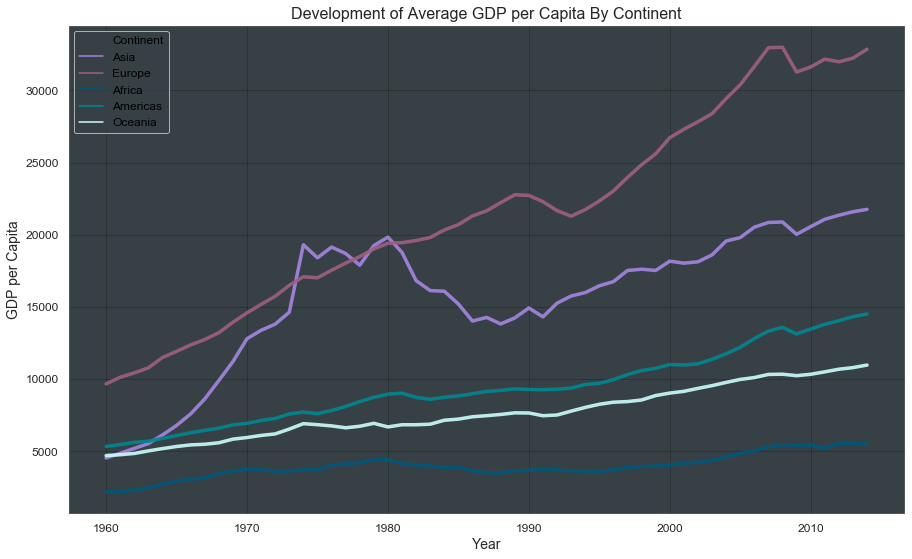

In [58]:
# create plot
fig, ax = plt.subplots(figsize=(15, 9))
# set dark background 
ax.set_facecolor("#374045")
# add grids
ax.grid(axis="x", linestyle="-", alpha=0.2, color="black")
ax.grid(axis="y", linestyle="-", alpha=0.2, color="black")

# create line plot
ax = sns.lineplot(data=df, x="Year", y="GDP per Capita", 
                  hue="Continent", palette=colors,
                  ci=None, linewidth=3.5, alpha=0.9)

# create x-label
ax.set_xlabel("Year", fontsize=14)
# create y-label
ax.set_ylabel("GDP per Capita", fontsize=14)
# create title
ax.set_title("Development of Average GDP per Capita By Continent", 
             fontsize=16)
# adjust labelsize of x and y axis
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# adjust legend 
leg = ax.legend(facecolor="#374045", fontsize=12)
for text in leg.get_texts():
        text.set_color("black")
        
# show plot
plt.show()

How did GDP develop in comparison to other variables within the dataset?

In [59]:
def plot_GDP_relation(variable, color):
    """
    Plotting relation of Average GDP Development over time with further variables.
    Inputs: variable: A numerical variable within the dataframe, e.g. "Life Expectancy".
            color: A string representing the color of the variable.
    Output: A lineplot containing the development of GDP per capita
            and the variable over time.
    """
    # Average gdp and life expectancy for each year worldwide
    data = df.groupby(["Year"])["GDP per Capita", variable].median()
    
    # instantiate a figure and axis object 
    fig, ax1 = plt.subplots(figsize=(15, 6))
    # dark background
    ax1.set_facecolor("#374045")
    # grid system
    ax1.grid(axis="x", linestyle="-", alpha=0.2, color="black")
    ax1.grid(axis="y", linestyle="-", alpha=0.2, color="black")
    
    # plot gdp per capita
    ax1 = sns.lineplot(data=data, x=data.index, y="GDP per Capita", 
                       color="orchid", label="GDP per Capita",
                       linewidth=3, alpha=0.9, marker="o")
    # define linestyle
    ax1.lines[0].set_linestyle("--")
    
    # create second y-axis
    ax2 = ax1.twinx()
    
    # use axis for new lineplot
    ax2 = sns.lineplot(data=data, x=data.index, y=variable, 
                       color=color, label=variable, 
                       linewidth=3, alpha=0.8, marker=">")
    # adjust line style
    ax2.lines[0].set_linestyle("-")
   
    # xlabel
    ax1.set_xlabel("Year", fontsize=14)
    # ylabel 1 
    ax1.set_ylabel("GDP per Capita", fontsize=14)
    # ylabel 2
    ax2.set_ylabel(variable, fontsize=14)
    # title
    ax1.set_title(f"Development of Average GDP per capita and {variable}", 
                  fontsize=16)
    # adjust labelsize of x and y axis
    ax1.tick_params(axis="both", which="major", labelsize=12)
    ax2.tick_params(axis="both", which="major", labelsize=12)

    # remove standard legend
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    # create new legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines = lines_1 + lines_2
    labels = labels_1 + labels_2
    # adjust legend
    leg = ax1.legend(lines, labels, loc="lower center", 
                     facecolor="#374045", fontsize=12)
    for text in leg.get_texts():
        text.set_color("black")
    
    # show plot
    plt.show()

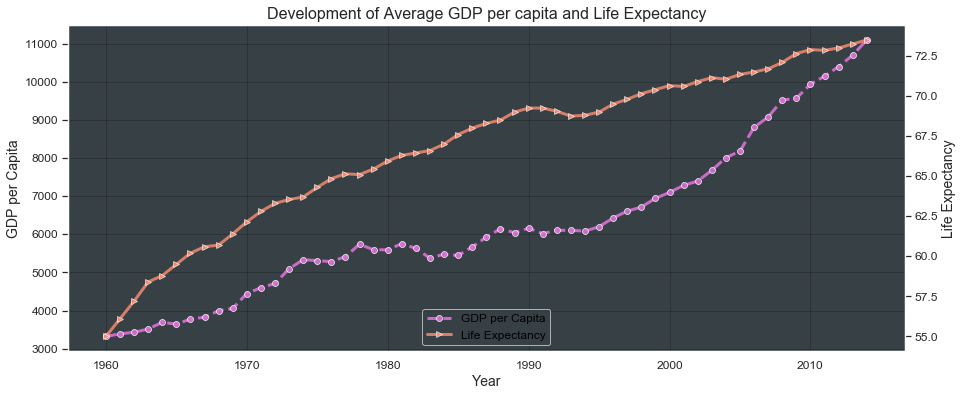

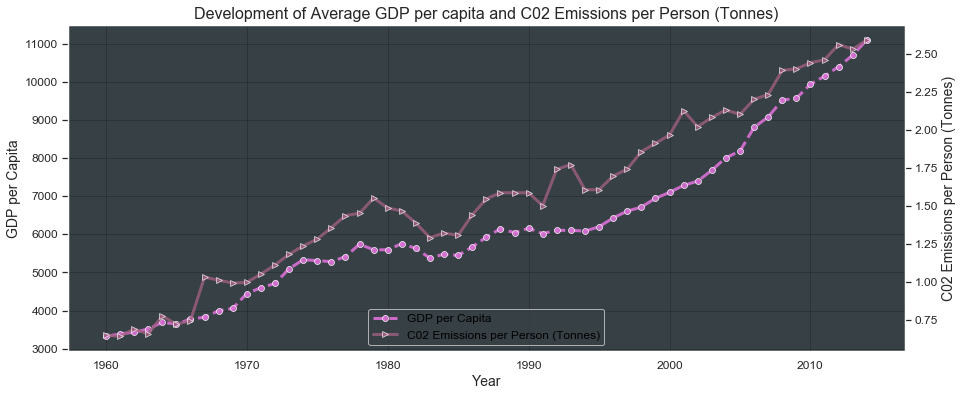

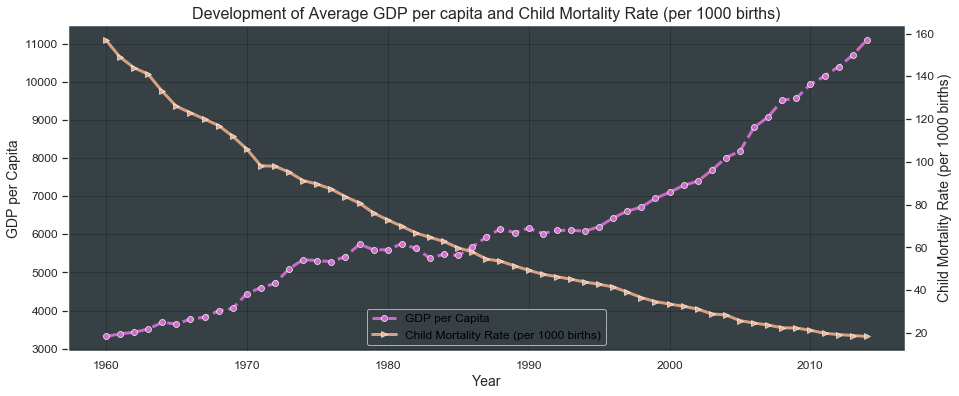

In [60]:
# define variables and colors 
vars = ["Life Expectancy", "C02 Emissions per Person (Tonnes)", 
 "Child Mortality Rate (per 1000 births)"]
colors = ["#ff8e71", "#9f5f80", "#FFBA93"]
# plot data
for var, col in zip(vars, colors):
    plot_GDP_relation(var, col)

### *3. Cross-sectional analysis of GDP per capita data from 2014*

How is GDP per capita distributed worldwide?

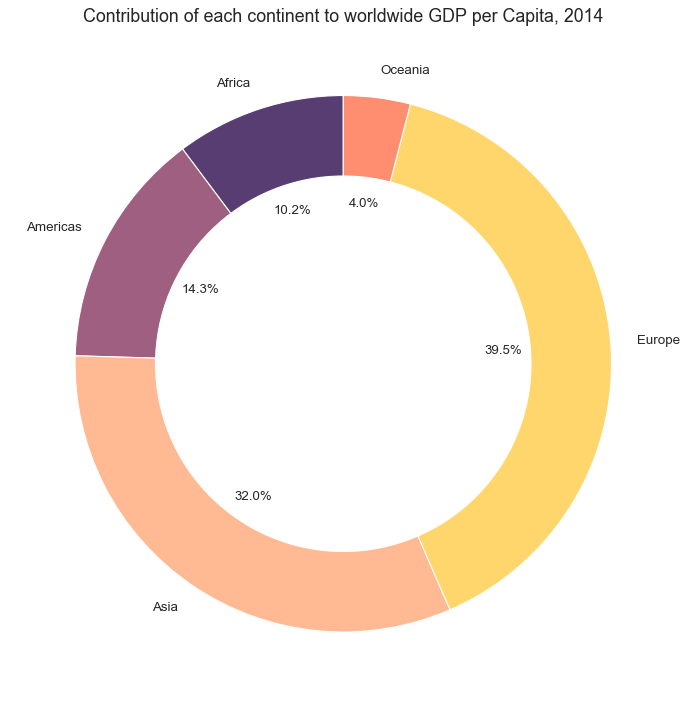

In [61]:
# share of each continent of total gdp per capita worldwide in 2014
share = df.groupby("Continent")["GDP per Capita"].sum().values

# define a colormap using a dictionary
color_discrete_map={"Africa":"#583d72",
                    "Americas":"#9f5f80",
                    "Asia":"#FFBA93",
                    "Europe":"#ffd66b",
                    "Oceania":"#ff8e71"}

# istantiate figure and axes
plt.figure(figsize=(13, 9), dpi=80)
plt.axes(aspect=1) 

# title
plt.title("Contribution of each continent to worldwide GDP per Capita, 2014", 
          fontsize=16)

# pie chart
plt.pie(share, labels=list(color_discrete_map.keys()), 
        colors=list(color_discrete_map.values()), 
        autopct="%1.1f%%", textprops={"fontsize": 12},
        startangle=90)

#draw circle
centre_circle = plt.Circle((0, 0), 0.7, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis("equal")  
plt.tight_layout()

# show plot 
plt.show()

How is GDP per Capita in 2014 distributed within each continent?

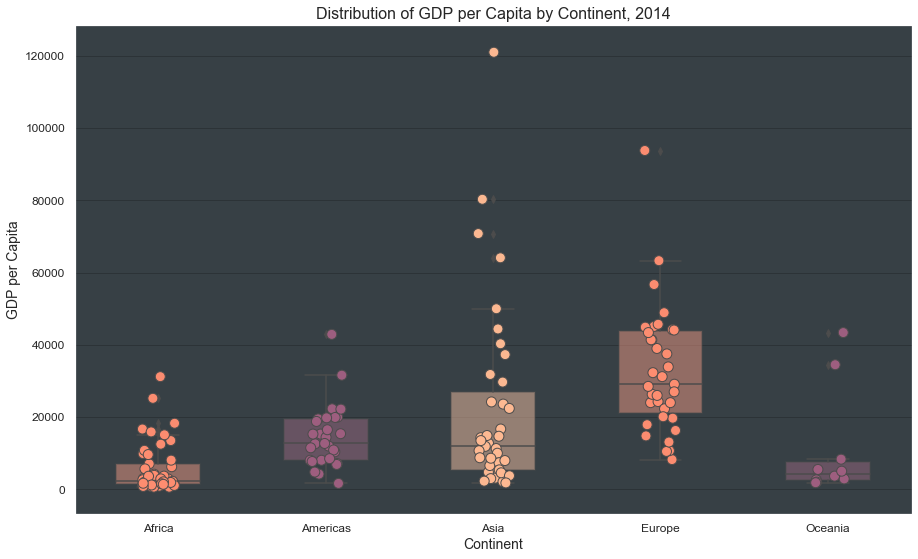

In [62]:
# instantiate fig and ax objects 
fig, ax = plt.subplots(figsize=(15, 9))
# background color
ax.set_facecolor("#374045")
# add grid
ax.grid(axis="y", linestyle="-", alpha=0.2, color="black")

# draw boxplot on axis object
ax = sns.boxplot(x="Continent", y="GDP per Capita", 
                 data=df[df.Year == 2014],  
                 width=0.5, palette=colors, 
                 boxprops=dict(alpha=.5))
# add stripplot
ax = sns.stripplot(x="Continent", y ="GDP per Capita", data=df[df["Year"]==2014],
                   jitter=True, linewidth=1, alpha=0.99, palette=colors, s=10)

# adjust labelsize of x and y axis
ax.tick_params(axis="both", which="major", labelsize=12)

# xlabel
ax.set_xlabel("Continent", fontsize=14)
# ylabel
ax.set_ylabel("GDP per Capita", fontsize=14)
# title 
ax.set_title("Distribution of GDP per Capita by Continent, 2014",
             fontsize=16)

# show plot
plt.show()

Which countries have the highest and which countries habe the lowest GDP per capita in 2014?

In [63]:
# GDP per capita top/bottom 25 worldwide 
def plot_ranking(top_25=True, mul=0.1):
    """
    Plotting top/ bottom 25 GDP per Capita worldwide.
    Inputs: top_25: Boolean, e.g.: False, to see bottom 25. 
            mul: Float, e.g: 0.1. Controls distance between bars and corresponding text.
    Output: A barplot containing GDP per capita for each country.
    """
    # Filter data 
    data = df[df.Year == 2014][["Country","GDP per Capita"]].sort_values(
    by="GDP per Capita", ascending=True)
    # keep top 25
    if top_25 is True:
        data = data.tail(25)
        title = "top 25"
    # keep bottom 25
    else:
        data = data[0:25]
        title = "bottom 25"
        
    
    # instantiate a figure and axis object 
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.set_facecolor("#374045")
    
    # define y-axis
    y_axis = list(data.Country)
    # get values
    values = list(data["GDP per Capita"])
    
    # create for each expense type an horizontal line that starts at x = 0 
    # with the length represented by the GDP value.
    plt.hlines(y=y_axis, xmin=0, xmax=data["GDP per Capita"], 
               color="#949cdf", alpha=0.6, linewidth=9)

    # create for each expense type a dot at the level of the expense 
    # percentage value
    plt.plot(data["GDP per Capita"], y_axis, "o", markersize=10, 
             color="#86aba1", alpha=0.99)
    
    # add values to barplot
    for index, value in enumerate(values):
        plt.text(values[index] + mul * values[0], y_axis[index], 
                 values[index], ha="left", va="center",
                 fontsize=10)

    # set labels
    ax.set_xlabel("GDP per Capita", fontsize=14, color="black")
    ax.set_ylabel("Country", fontsize=14, color="black")

    # set axis
    ax.tick_params(axis="both", which="major", labelsize=12)
    plt.yticks(y_axis, data.Country)

    # add an horizontal label for the y axis 
    fig.text(-0.01, 0.96, f"GDP per Capita Worldwide Ranked, {title}", 
             fontsize=16, color="black")

    # change the style of the axis spines
    ax.spines["top"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.spines["left"].set_smart_bounds(True)
    ax.spines["bottom"].set_smart_bounds(True)

    # set the spines position
    ax.spines["bottom"].set_position(("axes", -0.01))
    ax.spines["left"].set_position(("axes", -0.025))
    
    # set range of x-axis
    plt.xlim(0, np.max(data["GDP per Capita"]) + 
             0.2 * np.max(data["GDP per Capita"]))

    #show plot
    plt.show()

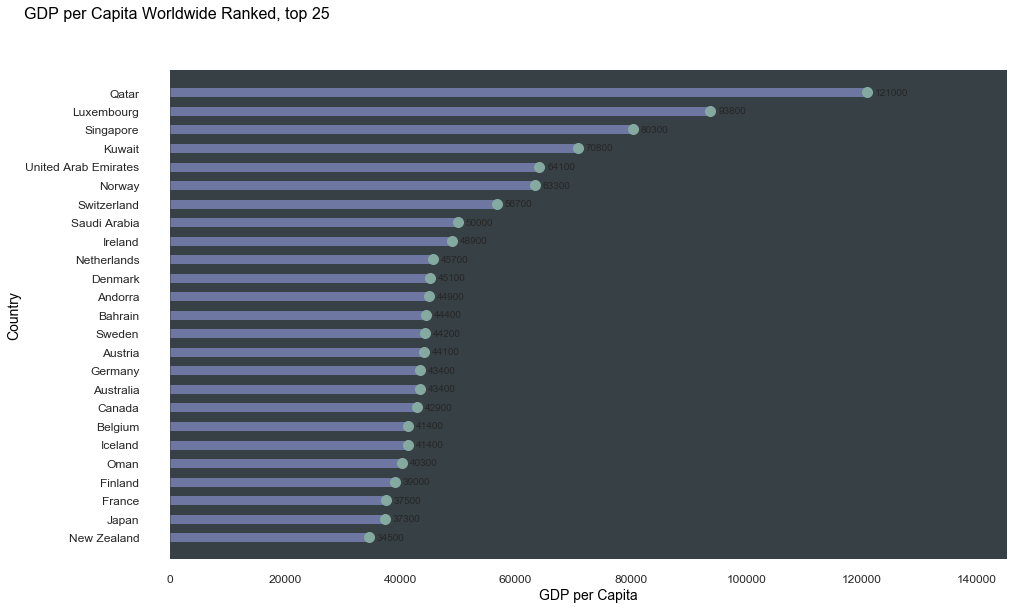

In [64]:
# plot top 25
plot_ranking(top_25=True, mul=0.04)

How is GDP per capita distributed in each continent?

In [65]:
# GDP per capita for each country i specified contient
def plot_GDP_by_continent(continent, year, mul=0.1):
    """
    Plotting GDP per Capita for each country in a given continent by year.
    Inputs: continent: String variable, e.g.: Asia. 
            year: An integer in the range of 1960-2014.
            mul: Float, e.g: 0.1. Controls distance between bars and corresponding text.
    Output: A barplot containing GDP per capita for each country.
    """
    # Filter data 
    data = df[(df.Year == year) & (df.Continent == continent)
             ][["Country", "GDP per Capita"]].sort_values(
        "GDP per Capita",ascending=True)
    
    # define y-axis 
    y_axis = list(data.Country)
    # get values
    values = list(data["GDP per Capita"])
    
    # instantiate a figure and axis object 
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_facecolor("#374045")

    # create for each expense type an horizontal line that starts at x = 0 
    # with the length represented by the GDP value.
    plt.hlines(y=y_axis, xmin=0, xmax=data["GDP per Capita"], 
               color="#944e6c", alpha=0.6, linewidth=9)

    # create for each expense type a dot at the level of the expense 
    # percentage value
    plt.plot(data["GDP per Capita"], y_axis, "o", markersize=10, 
             color="#a7c5eb", alpha=0.99)
    
    # add values to barplot
    for index, value in enumerate(values):
        plt.text(values[index] + mul * values[0], y_axis[index], 
                 values[index], ha="left", va="center",
                 fontsize=10)

    # set labels
    ax.set_xlabel("GDP per Capita", fontsize=14, color="black")
    ax.set_ylabel("Country", fontsize=14, color="black")

    # set axis
    ax.tick_params(axis="both", which="major", labelsize=12)
    plt.yticks(y_axis, data.Country)

    # add an horizontal label for the y axis 
    fig.text(-0.01, 0.96, "GDP per Capita Distribution in"
             f" {continent}, {year}", 
             fontsize=16, color="black")

    # change the style of the axis spines
    ax.spines["top"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.spines["left"].set_smart_bounds(True)
    ax.spines["bottom"].set_smart_bounds(True)

    # set the spines position
    ax.spines["bottom"].set_position(("axes", -0.04))
    ax.spines["left"].set_position(("axes", -0.025))
    
    # set range of x-axis
    plt.xlim(0, np.max(data["GDP per Capita"]) + 
             0.2 * np.max(data["GDP per Capita"]))

    #show plot
    plt.show()

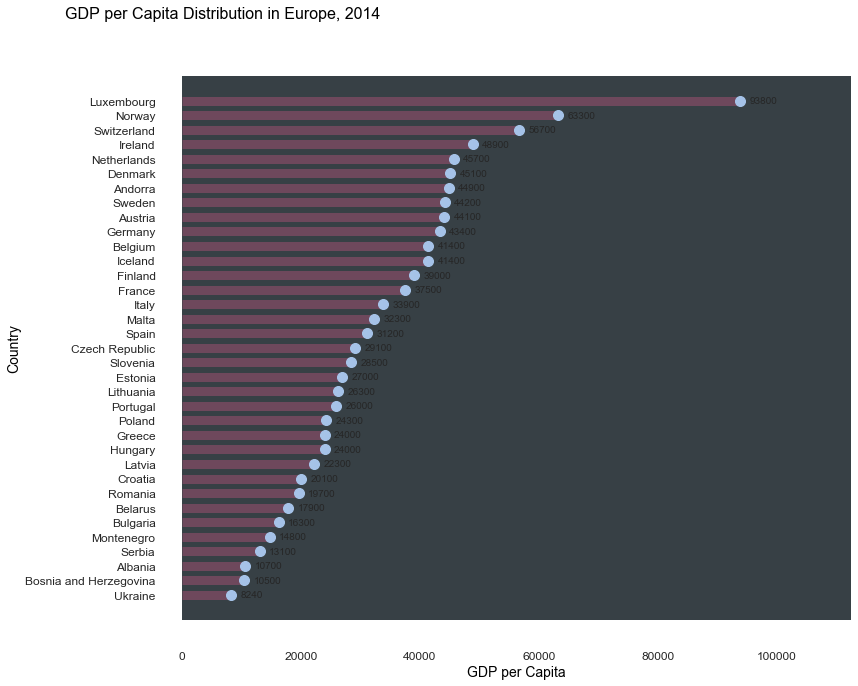

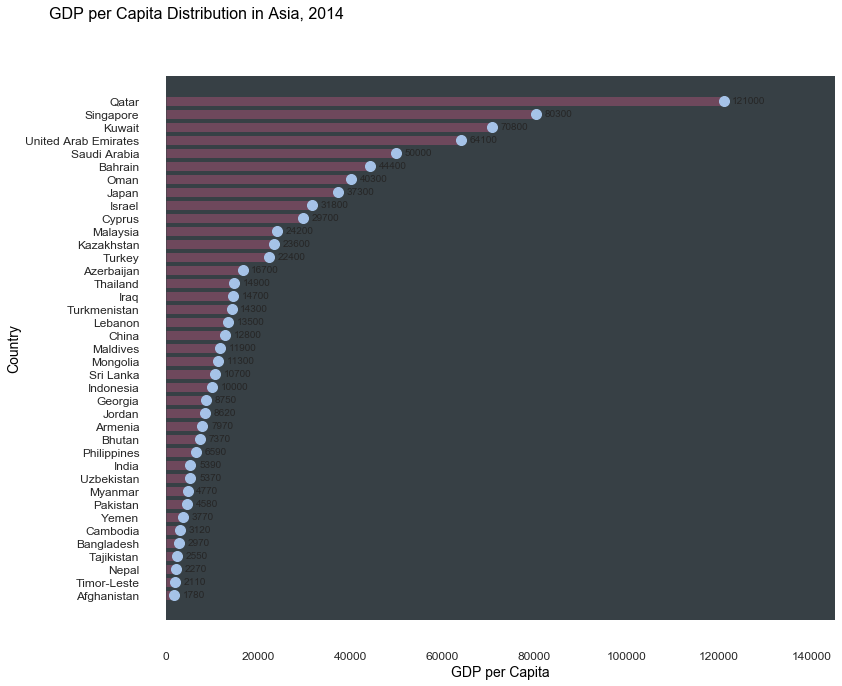

In [66]:
# plot GDP per capita for Europe and Asia in 2014
plot_GDP_by_continent(continent="Europe", year=2014, mul=0.19)
plot_GDP_by_continent(continent="Asia", year=2014, mul=1.07)
plt.show()

# For comparison, see how distribution looked like in 1960
#plot_GDP_by_continent(continent="Europe", year=1960)

How is GDP per Capita linked to other variables within the dataset?

In [67]:
def corr_plot(variable):
    """
    Plotting GDP per Capita related to other variables within the dataset.
    Input: variable: String variable, e.g.: C02 Emissions per Person (Tonnes). 
    Output: A scatterplot showing relationship between GDP per capita 
            and the input variable.
    """
    # specify colors
    colors = ["#583d72", "#9f5f80", "#FFBA93", "#ff8e71", "#ffd66b"]
    
    # instantiate fig and ax objects 
    fig, ax = plt.subplots(figsize=(15, 9))
    # backgroundcolor
    ax.set_facecolor("#374045")
    # grid
    #ax.grid(axis="x", linestyle="-", alpha=0.2, color="black")
    #ax.grid(axis="y", linestyle="-", alpha=0.2, color="black")
    
    # draw plot on axis object
    ax = sns.scatterplot(data=df[df.Year == 2014], color="#949cdf",
                         x="GDP per Capita", y=variable,
                         linewidth=0.4, s=95, alpha=0.85)
    
    # adjust ticksize of x and y axis
    ax.tick_params(axis="both", which="major", labelsize=12)
    
    # xlabel
    ax.set_xlabel("GDP per Capita", fontsize=14)
    # ylabel
    ax.set_ylabel(variable, fontsize=14)
    # title
    ax.set_title(f"Relation of GDP per Capita and {variable} 2014", 
                 fontsize=16)
    
    # show plot
    plt.show()

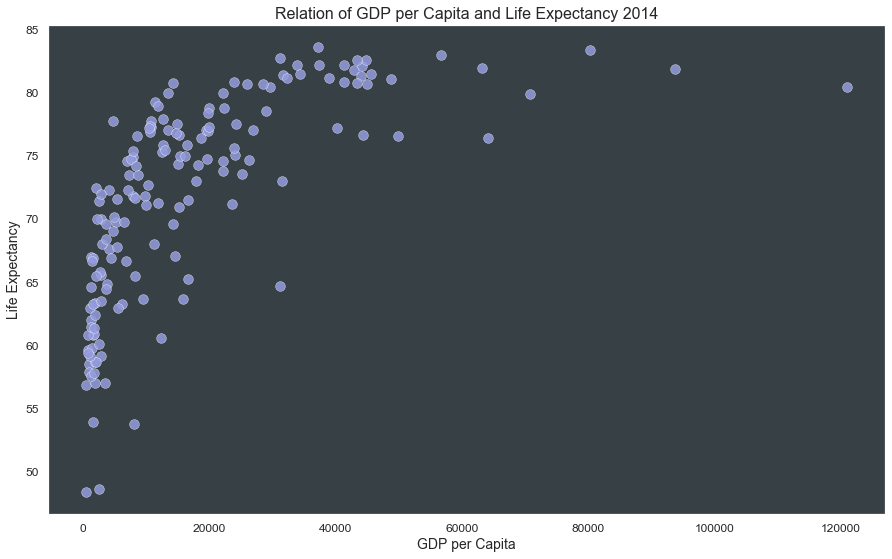

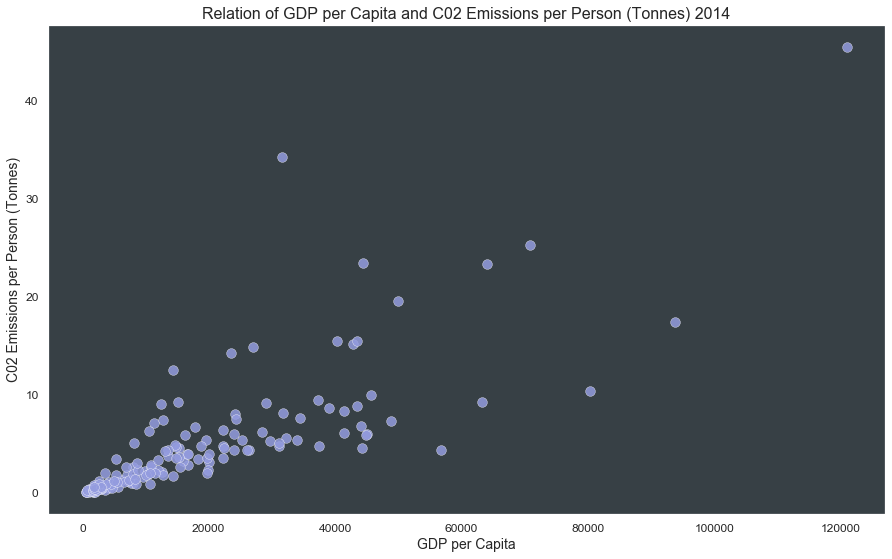

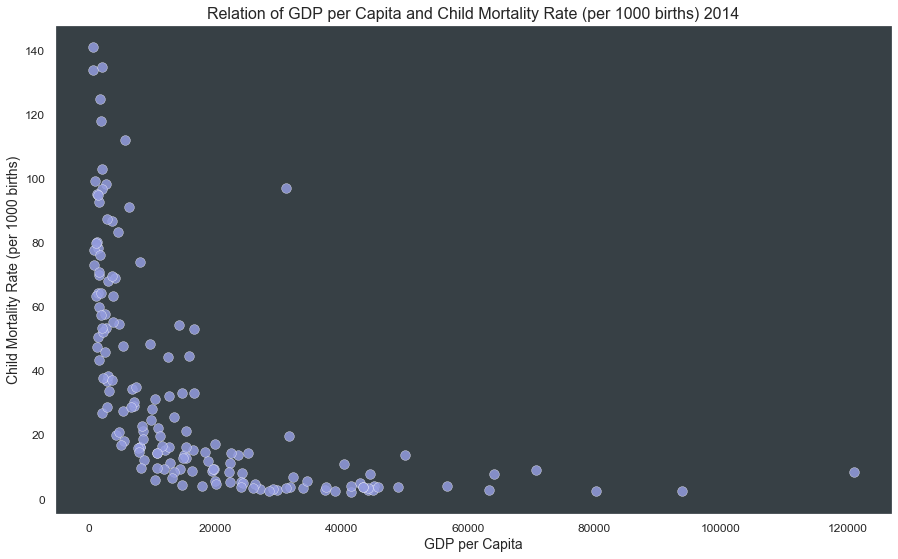

In [68]:
# define list of variables
vars = ["Life Expectancy", "C02 Emissions per Person (Tonnes)", 
 "Child Mortality Rate (per 1000 births)"]

# plot data
for var in vars:
    corr_plot(var)

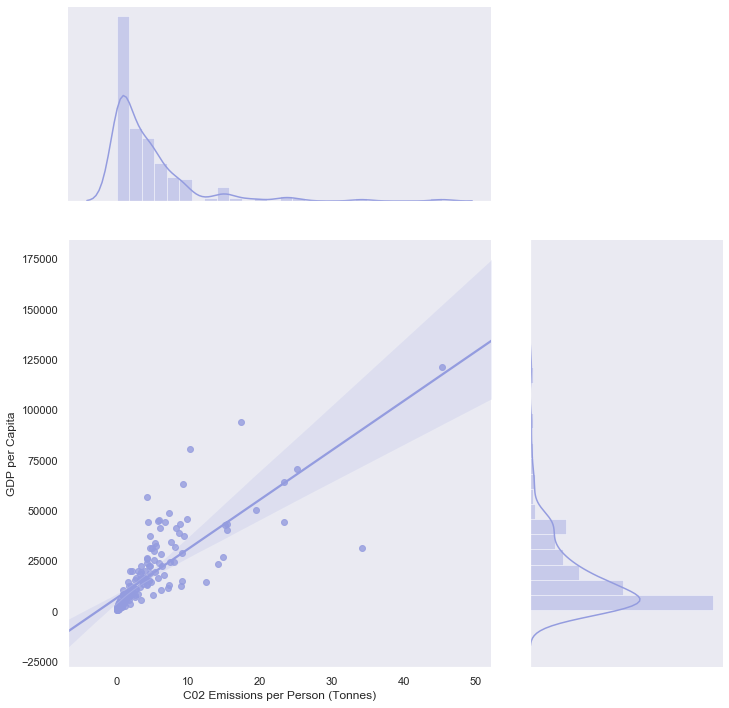

In [69]:
# Seaborn jointplot with regression line and univariate KDE curves
sns.set(style="dark", color_codes=True)
sns.jointplot(data=df[df.Year == 2014], 
              x="C02 Emissions per Person (Tonnes)", y="GDP per Capita", 
              kind="reg", color="#949cdf",  height=10, ratio=2)
plt.show()
                         
    
